<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Boosting" data-toc-modified-id="Introduction-to-Boosting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Boosting</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Train-Validation-with-stratify" data-toc-modified-id="Train-Validation-with-stratify-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Validation with stratify</a></span></li><li><span><a href="#Modelling-xgboost-imbalanced-data" data-toc-modified-id="Modelling-xgboost-imbalanced-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling xgboost imbalanced data</a></span></li><li><span><a href="#Xgboost-modelling-Undersampled-data" data-toc-modified-id="Xgboost-modelling-Undersampled-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Xgboost modelling Undersampled data</a></span></li><li><span><a href="#Xgboost-modelling-Undersampled-data-with-n_estimators-=-150" data-toc-modified-id="Xgboost-modelling-Undersampled-data-with-n_estimators-=-150-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Xgboost modelling Undersampled data with n_estimators = 150</a></span></li><li><span><a href="#HPO-Hyper-Parameter-Optimization-using-hyperopt" data-toc-modified-id="HPO-Hyper-Parameter-Optimization-using-hyperopt-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>HPO Hyper Parameter Optimization using hyperopt</a></span></li><li><span><a href="#HPO-Notes" data-toc-modified-id="HPO-Notes-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO Notes</a></span></li><li><span><a href="#HPO-for-imbalanced-data" data-toc-modified-id="HPO-for-imbalanced-data-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>HPO for imbalanced data</a></span></li><li><span><a href="#HPO-Hyper-Parameter-Optimization-with-Optuna" data-toc-modified-id="HPO-Hyper-Parameter-Optimization-with-Optuna-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>HPO Hyper Parameter Optimization with Optuna</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Model-interpretation-using-eli5" data-toc-modified-id="Model-interpretation-using-eli5-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Model interpretation using eli5</a></span></li><li><span><a href="#Model-interpretation-using-shap" data-toc-modified-id="Model-interpretation-using-shap-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Model interpretation using shap</a></span></li></ul></li></ul></div>

# Introduction to Boosting
References: 
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- http://xgboost.readthedocs.org/en/latest/parameter.html#general-parameters
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [1]:
import time

notebook_start_time = time.time()

In [2]:
import bhishan

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd

SEED = 100

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams.update({'font.size': 16})

plt.style.use('ggplot')
%matplotlib inline

In [6]:
import xgboost as xgb

In [7]:
# six and pickle
import six
import pickle
import joblib

In [8]:
# scale and split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [9]:
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# sklearn scalar metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [11]:
# roc auc and curves
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [12]:
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
import time

In [14]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Useful Scripts

In [15]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [16]:
df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F1':[],
                        'AUC':[],
                    })

# Load the data

In [17]:
ifile = 'https://github.com/bhishanpdl/Project_Fraud_Detection/blob/master/data/raw/creditcard.csv.zip?raw=true'
df = pd.read_csv(ifile,compression='zip')
print(df.shape)
df.head()

(284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [18]:
target = 'Class'
df[target].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Train test split with stratify

In [19]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])


ytrain_orig = ser_ytrain_orig.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

# Train Validation with stratify

In [20]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


Time        V1        V2        V3        V4        V5        V6  \
35574    38177.0  1.430419 -0.718078  0.364706 -0.744257 -0.556090  0.698948   
46862    42959.0 -2.425523 -1.790293  2.522139  0.581141  0.918453  0.594426   
181781  125124.0 -0.255451 -1.988955 -1.259725 -2.196052 -1.324357  0.004999   
218475  141330.0 -0.852000 -0.130753  1.366625 -0.375116  1.257245  0.050009   
15062    26410.0 -0.782845  0.368745  2.491474  1.601648 -0.417058  1.017225   

              V7        V8        V9  ...       V20       V21       V22  \
35574  -0.949852  0.131008 -0.314353  ...  0.158424  0.042013  0.429576   
46862   0.224541  0.373885 -0.168411  ...  0.984535  0.538438  0.877560   
181781  1.661537 -0.422359 -2.219274  ...  0.697580  0.566413  1.241385   
218475 -0.218389  0.176564  0.335049  ...  0.281607  0.277023  0.786877   
15062   0.366164  0.020070  0.037205  ...  0.168045  0.126913  0.822213   

             V23       V24       V25       V26       V27       V28  Amount  
35574  -0.301931 -0.933773  0.840490 -0.027776  0.044688 -0.007522    0.20  
46862   0.590595 -0.293545  0.524022 -0.328189 -0.205285 -0.109163  300.00  
181781  0.955373  0.460405  0.087524  0.127633 -0.104306  0.077857  502.62  
218475 -0.262423  0.097049  0.200534 -0.115078  0.141612  0.159208    4.99  
15062  -0.074362 -0.260301  0.212852  0.066400 -0.051980 -0.187419   99.00  

[5 rows x 30 columns]

In [21]:
# random undersampling
n = df[target].value_counts().values[-1]
df_under = (df.groupby(target)
                .apply(lambda x: x.sample(n,random_state=SEED))
                .reset_index(drop=True))


df_Xtrain_orig_under, df_Xtest_under, ser_ytrain_orig_under, ser_ytest_under = train_test_split(
    df_under.drop(target,axis=1),
    df_under[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df_under[target])




df_Xtrain_under, df_Xvalid_under, ser_ytrain_under, ser_yvalid_under = train_test_split(
    df_Xtrain_orig_under,
    ser_ytrain_orig_under,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig_under)


ser_ytrain.value_counts(), ser_ytest.value_counts(), ser_yvalid.value_counts()

(0    181961
 1       315
 Name: Class, dtype: int64, 0    56864
 1       98
 Name: Class, dtype: int64, 0    45490
 1       79
 Name: Class, dtype: int64)

# Modelling xgboost imbalanced data
```
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```


[early stopping xgboost official note](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  


If early stopping occurs, the model will have three additional fields: bst.best_score, bst.best_iteration and bst.best_ntree_limit.
 Note that xgboost.train() will return a model from the last iteration, not the best one.
[Example](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)
```python
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])

```

In [22]:
# help(XGBClassifier)

Time taken: 1 min 35 secs


Model          Description  Accuracy  Precision    Recall        F1  \
0  Xgboost  default, imbalanced  0.999263       0.85  0.693878  0.764045   

        AUC  
0  0.846833

[[56852    12]
 [   30    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



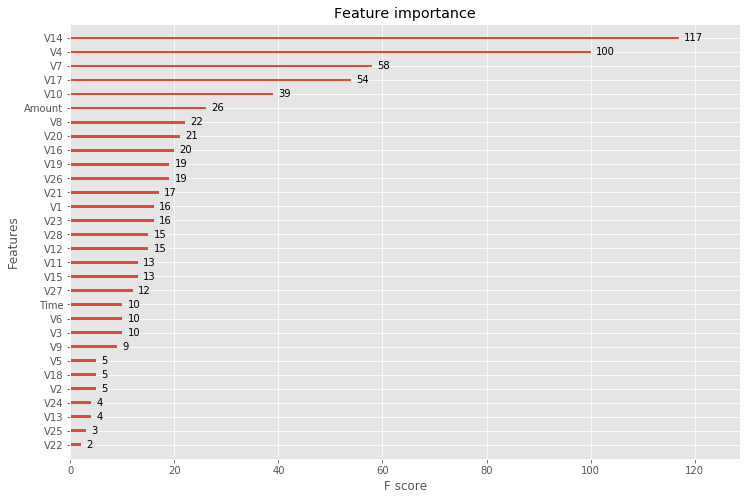

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameters
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig
Xtx = df_Xtest
ytx = ser_ytest

Xvd = df_Xvalid
yvd = ser_yvalid

# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

clf_xgb.fit(Xtr, ytr)



default = """
[[56852    12]
 [   30    68]]

"""

# clf_xgb.fit(Xtr,yt,
#             eval_set=[(Xvd,yvd)],
#             eval_metric='auc',
#             early_stopping_rounds=30, # early stopping gives 
#             )
early30 = """

[[56852    12]
 [   30    68]]
"""


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_xgb, Xtx, ytx, cv=skf)
ypreds = ypreds_cv



# model evaluation
average = 'binary'
row_eval = ['Xgboost','default, imbalanced', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(clf_xgb,ax=ax)
plt.show()

# Xgboost modelling Undersampled data

Time taken: 0 min 15 secs


Model             Description  Accuracy  Precision    Recall        F1  \
0  Xgboost     default, imbalanced  0.999263       0.85  0.693878  0.764045   
1  Xgboost  default, undersampling  0.999263       0.85  0.693878  0.764045   

        AUC  
0  0.846833  
1  0.846833

[[56852    12]
 [   30    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



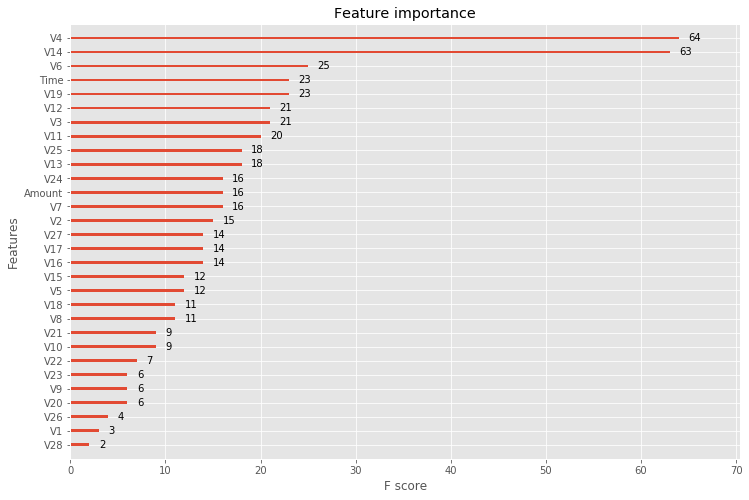

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameter
Xtr = df_Xtrain_under
ytr = ser_ytrain_under
Xtx = df_Xtest
ytx = ser_ytest

Xvd = df_Xvalid
yvd = ser_yvalid


# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

clf_xgb.fit(Xtr, ytr)


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_xgb, Xtx, ytx, cv=skf)
ypreds = ypreds_cv


# model evaluation
average = 'binary'
row_eval = ['Xgboost','default, undersampling', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(clf_xgb,ax=ax)
plt.show()

# Xgboost modelling Undersampled data with n_estimators = 150

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()
# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150)

clf_xgb.fit(df_Xtrain_under, ser_ytrain_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Time taken: 2 min 31 secs


Model                   Description  Accuracy  Precision    Recall  \
0  Xgboost           default, imbalanced  0.999263       0.85  0.693878   
1  Xgboost        default, undersampling  0.999263       0.85  0.693878   
2  Xgboost  n_estimators=150, imbalanced  0.999263       0.85  0.693878   

         F1       AUC  
0  0.764045  0.846833  
1  0.764045  0.846833  
2  0.764045  0.846833

[[56852    12]
 [   30    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



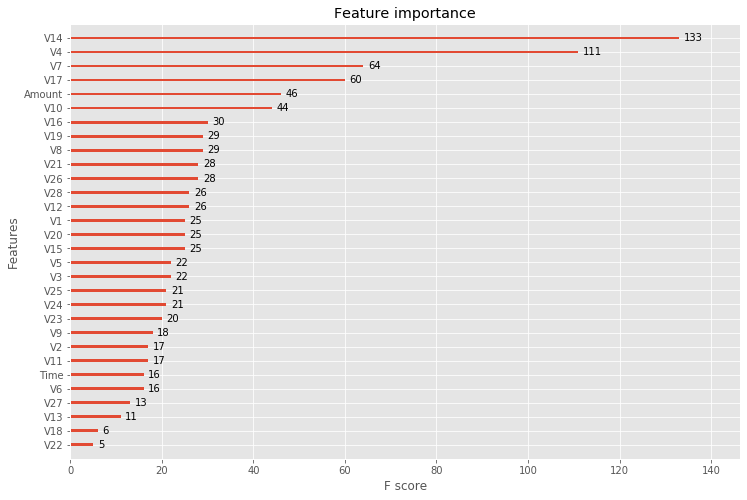

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameters
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig
Xtx = df_Xtest
ytx = ser_ytest
Xvd = df_Xvalid
yvd = ser_yvalid

# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150)

clf_xgb.fit(Xtr, ytr)


# clf_xgb.fit(Xtr,yt,
#             eval_set=[(Xvd,yvd)],
#             eval_metric='auc',
#             early_stopping_rounds=30, # early stopping gives 
#             )


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_xgb, Xtx, ytx, cv=skf)
ypreds = ypreds_cv



# model evaluation
average = 'binary'
row_eval = ['Xgboost','n_estimators=150, imbalanced', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(clf_xgb,ax=ax)
plt.show()

# HPO Hyper Parameter Optimization using hyperopt

**Important Parameters**:

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.


**Regularization parameters**:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [27]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

def hpo_hyperopt(param_space, Xtrain, ytrain, Xtest, ytest, num_eval,cv=3):
    """HPO using hyperopt package.

    Hyper Parameter Optimation using Bayesian methods.

    Usage:
    -------
    num_eval = 500 # number of evaluations
    param_hyperopt = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 1000, 50)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    }


    trials, dict_best_params1 = hpo_hyperopt(param_hyperopt,
                                Xtrain_under, ytrain_under,
                                Xtest_under, ytest_under, num_eval)

    clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        **dict_best_params1)

    """
    # time
    time_start = time.time()
    
    # define objective function
    def objective_function(params):
        model = xgb.XGBClassifier(**params)
        score = cross_val_score(model, Xtrain, ytrain, cv=cv).mean()
        return {'loss': -score, 'status': STATUS_OK}

    # keep track of trials
    trials = Trials()

    # best params
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials,
                      rstate= np.random.RandomState(SEED))
    
    # dict best params
    dict_best_params = copy.copy(best_param)

    if 'boosting_type' in dict_best_params: 
        dict_best_params['boosting_type'] = 'gbdt' if dict_best_params['boosting_type'] == 0 else 'dart'


    int_params = ['max_depth','num_leaves','n_estimators']

    for int_param in int_params:
        # make integer if exist
        if int_param in dict_best_params:
            dict_best_params[int_param] = int(dict_best_params[int_param])
    
    # loss
    loss = [x['result']['loss'] for x in trials.trials]

    # best model    
    model_best = xgb.XGBClassifier(**dict_best_params)                      
    model_best.fit(Xtrain, ytrain)

    time_taken = time.time() - time_start
    
    print("\nResults\n" + '='*50)
    print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
    print("Number of parameter combinations tested: ", num_eval)
    print("Train Score Best                       : {:.4f} ".format(min(loss)*-1))
    print("Test Score                             : {:.4f} ".format(model_best.score(Xtest, ytest)))
    print("Best parameters:")
    pp.pprint(dict_best_params)
    
    return trials, dict_best_params

In [28]:
num_eval = 50 # number of evaluations
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    # 'n_estimators': scope.int(hp.quniform('n_estimators', 150, 151, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 0.1),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 0.1),
    # 'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
}



# current parameters
Xtr = df_Xtrain_under
ytr = ser_ytrain_under
Xtx = df_Xtest
ytx = ser_ytest
Xvd = df_Xvalid
yvd = ser_yvalid


# parameters
trials, dict_best_params = hpo_hyperopt(param_hyperopt, 
                                Xtr, ytr,
                                Xvd, yvd, num_eval)

# override best params
# dict_best_params['boosting_type'] = 'gbdt'
time_start = time.time()
# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150,
                        **dict_best_params)

print(clf_xgb)
clf_xgb.fit(Xtr, ytr)


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_xgb, Xtx, ytx, cv=skf)
ypreds = ypreds_cv

# model evaluation
row_eval = ['Xgboost','undersample, hpo1', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average='binary'),
            recall_score(ytx, ypreds, average='binary'),
            f1_score(ytx, ypreds, average='binary'),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

100%|█████████████████████████████████████████████████████████████████████████| 50/50 [00:15<00:00,  3.33it/s, best loss: -0.9348370927318296]

Results
Time taken: 0 min 15 secs
Number of parameter combinations tested:  50
Train Score Best                       : 0.9348 
Test Score                             : 0.9587 
Best parameters:
{   'boosting_type': 'gbdt',
    'colsample_by_tree': 0.8758760876859764,
    'learning_rate': 0.27594126339294334,
    'max_depth': 10,
    'min_child_weight': 1.0,
    'num_leaves': 30,
    'subsample': 0.8920665816872455,
    'x_gamma': 0.4724282297633859}
XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='gbdt',
              colsample_by_tree=0.8758760876859764, colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.27594126339294334,
              max_delta_step=0, max_depth=10, min_child_weight=1.0,
              missing=None, n_estimators=150, n_jobs=-1, nthread=None,
              num_leaves=30, objective='bi

Model                   Description  Accuracy  Precision    Recall  \
0  Xgboost           default, imbalanced  0.999263   0.850000  0.693878   
1  Xgboost        default, undersampling  0.999263   0.850000  0.693878   
2  Xgboost  n_estimators=150, imbalanced  0.999263   0.850000  0.693878   
3  Xgboost             undersample, hpo1  0.999298   0.881579  0.683673   

         F1       AUC  
0  0.764045  0.846833  
1  0.764045  0.846833  
2  0.764045  0.846833  
3  0.770115  0.841758

[[56855     9]
 [   31    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



# HPO Notes

- [Analytic Vidhya detail hyper parameter description for xgboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)


```python
num_eval = 50
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    # 'n_estimators': scope.int(hp.quniform('n_estimators', 150, 151, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    #'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    #'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}
[[97  2]
 [ 8 90]]
 XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='dart',
              colsample_by_tree=0.425706475356356, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04110731401631858, max_delta_step=0, max_depth=11,
              min_child_weight=10.0, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, num_leaves=46, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9164366853711832,
              verbosity=1)
              

**Warning** 
with same params but increasing num_eval to 500 gives worse result:
[97  2]
 [10 88]]
```

# HPO for imbalanced data

In [29]:
num_eval = 10 # number of evaluations
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    # 'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 50)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 0.1),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 0.1),
    # 'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    # 'gamma' : hp.uniform ('gamma', 0.1,0.5),
}

# current parameters
Xtr = df_Xtrain
ytr = ser_ytrain
Xtx = df_Xtest
ytx = ser_ytest
Xvd = df_Xvalid
yvd = ser_yvalid


# params
trials, dict_best_params = hpo_hyperopt(param_hyperopt,
                                Xtr, ytr,
                                Xvd, yvd, num_eval)

# override best params
# dict_best_params1['boosting_type'] = 'gbdt'
time_start = time.time()

# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150,
                        **dict_best_params)

print(clf_xgb)
clf_xgb.fit(Xtr, ytr)


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_xgb, Xtx, ytx, cv=skf)
ypreds = ypreds_cv

# model evaluation
row_eval = ['Xgboost','imbalanced, hpo', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average='binary'),
            recall_score(ytx, ypreds, average='binary'),
            f1_score(ytx, ypreds, average='binary'),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

100%|██████████████████████████████████████████████████████████████████████████| 10/10 [08:28<00:00, 50.85s/it, best loss: -0.999555619222339]

Results
Time taken: 9 min 12 secs
Number of parameter combinations tested:  10
Train Score Best                       : 0.9996 
Test Score                             : 0.9995 
Best parameters:
{   'boosting_type': 'gbdt',
    'colsample_by_tree': 0.8040279979830232,
    'learning_rate': 0.6183443388044544,
    'max_depth': 7,
    'min_child_weight': 3.0,
    'num_leaves': 37,
    'subsample': 0.8254724276776704}
XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='gbdt',
              colsample_by_tree=0.8040279979830232, colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.6183443388044544,
              max_delta_step=0, max_depth=7, min_child_weight=3.0, missing=None,
              n_estimators=150, n_jobs=-1, nthread=None, num_leaves=37,
              objective='binary:logistic', random_state=100, reg_a

Model                   Description  Accuracy  Precision    Recall  \
0  Xgboost           default, imbalanced  0.999263   0.850000  0.693878   
1  Xgboost        default, undersampling  0.999263   0.850000  0.693878   
2  Xgboost  n_estimators=150, imbalanced  0.999263   0.850000  0.693878   
3  Xgboost             undersample, hpo1  0.999298   0.881579  0.683673   
4  Xgboost               imbalanced, hpo  0.999245   0.898551  0.632653   

         F1       AUC  
0  0.764045  0.846833  
1  0.764045  0.846833  
2  0.764045  0.846833  
3  0.770115  0.841758  
4  0.742515  0.816265

[[56857     7]
 [   36    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.63      0.74        98

    accuracy                           1.00     56962
   macro avg       0.95      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



# HPO Hyper Parameter Optimization with Optuna

In [30]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [31]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

In [32]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=SEED,num_eval=10,n_estimators=10)
clf_xgb.fit(df_Xtrain,ser_ytrain)

ypreds = clf_xgb.predict(df_Xtest)
    
score = roc_auc_score(ser_ytest.to_numpy().ravel(),
                          ypreds)
    
print(score)

0.8569582060455021


In [33]:
def objective(trial):

    params_xgb_optuna = {
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
        'max_depth':trial.suggest_int('max_depth', 5, 20),
        'n_estimators': trial.suggest_int('n_estimators', 150, 1000), 
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
    }

    clf_xgb = XGBClassifier(random_state=SEED,**params_xgb_optuna)
    clf_xgb.fit(df_Xtrain,ser_ytrain)
    
    ypreds = clf_xgb.predict(df_Xvalid)
    score = roc_auc_score(ser_yvalid.to_numpy().ravel(),
                              ypreds)
    return score

In [34]:
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.


sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage='sqlite:///xgb_optuna_fraud_classifcation.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

In [35]:
# Resume hyper parameter from last state

sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage='sqlite:///xgb_optuna_fraud_classifcation.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS,timeout=600)

In [36]:
print(f'Number of finished trials: {len(study.trials)}')

# best trail
best_trial = study.best_trial

# best params
params_best = study.best_trial.params
params_best

Number of finished trials: 3


{'learning_rate': 0.014914880124867256,
 'max_depth': 8,
 'n_estimators': 229,
 'reg_alpha': 0.00010673654409335861,
 'reg_lambda': 1.643202957187065e-07,
 'subsample': 0.953432839695971}

In [37]:
# time
time_start = time.time()

model_name = 'xgboost'
desc = 'grid search optuna'
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()
Xvd = df_Xvalid
yvd = ser_yvalid.to_numpy().ravel()

# use best model
params_best =  study.best_trial.params

clf_lgb = clf_lgb = xgb.XGBClassifier(random_state=SEED)
clf_lgb.set_params(**params_best)

# fit and save the model
clf_lgb.fit(Xtr, ytr)
joblib.dump(clf_lgb,'../outputs/clf_xgb_grid_search_optuna.pkl')

# load the saved model
clf_lgb = joblib.load('../outputs/clf_xgb_grid_search_optuna.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_lgb, Xtx, ytx, cv=skf)
ypreds = ypreds_cv

# model evaluation
average = 'binary'
row_eval = [model_name,desc, 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
            ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

Time taken: 5 min 5 secs


Model                   Description  Accuracy  Precision    Recall  \
0  Xgboost           default, imbalanced  0.999263   0.850000  0.693878   
1  Xgboost        default, undersampling  0.999263   0.850000  0.693878   
2  Xgboost  n_estimators=150, imbalanced  0.999263   0.850000  0.693878   
3  Xgboost             undersample, hpo1  0.999298   0.881579  0.683673   
4  Xgboost               imbalanced, hpo  0.999245   0.898551  0.632653   
5  xgboost            grid search optuna  0.999333   0.875000  0.714286   

         F1       AUC  
0  0.764045  0.846833  
1  0.764045  0.846833  
2  0.764045  0.846833  
3  0.770115  0.841758  
4  0.742515  0.816265  
5  0.786517  0.857055

In [38]:
df_eval.sort_values('Recall',ascending=False).style.background_gradient(subset='Recall')

In [39]:
cm = confusion_matrix(ytest,ypreds)
vals = cm.ravel()

cm

array([[56854,    10],
       [   28,    70]])

In [40]:
print('xgboost Grid Search Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

xgboost Grid Search Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  28
Incorrect Percent:  28.57 %


In [41]:
from bhishan.bhishan import plotly_binary_clf_evaluation

yprobs = clf_xgb.predict_proba(df_Xtest)
yprobs = yprobs[:,0] # take only first column

plotly_binary_clf_evaluation('clf_lgb_optuna',clf_xgb,ytx,ypreds,yprobs,df)

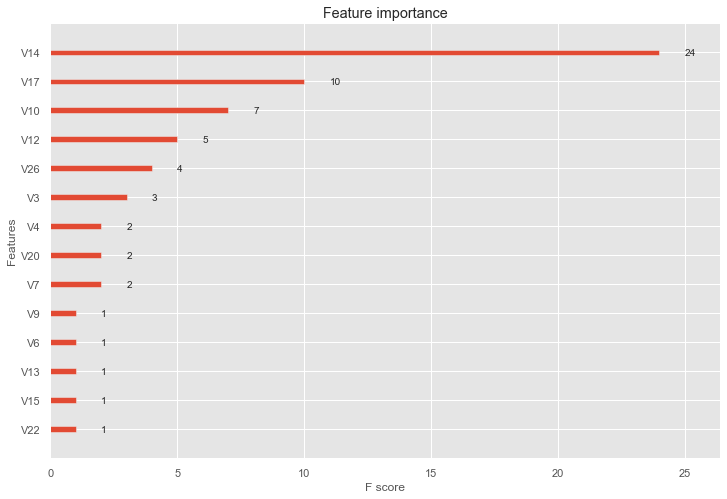

In [42]:
# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(clf_xgb,ax=ax)
plt.show()

# Model Interpretation

In [43]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

## Model interpretation using eli5

In [44]:
import eli5

eli5.show_weights(clf_xgb)

In [45]:
from eli5.sklearn import PermutationImportance

feature_names = df_Xtrain.columns.tolist()

perm = PermutationImportance(clf_xgb).fit(df_Xtest, ytx)
eli5.show_weights(perm, feature_names=feature_names)

## Model interpretation using shap

In [46]:
import shap
shap.initjs()

In [47]:
clf_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
              n_jobs=1, nthread=None, num_eval=10, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [48]:
params_xgb = dict(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, n_estimators=10,
              n_jobs=1, nthread=-1, num_eval=10, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=SEED, silent=True, subsample=1)

In [49]:
feature_names = df_Xtrain.columns.tolist()
dtrain = xgb.DMatrix(df_Xtrain, ser_ytrain,feature_names=feature_names)
dvalid = xgb.DMatrix(df_Xvalid, ser_yvalid,feature_names=feature_names)
dtest = xgb.DMatrix(df_Xtest,feature_names=feature_names)
n_rounds = 100

watchlist = [(dtrain, 'dtrain'), (dvalid, 'dvalid')]
booster_model = xgb.train(params_xgb,
                  dtrain,
                  n_rounds,
                  watchlist,
                  verbose_eval=10,
                  early_stopping_rounds=20)

ypreds = booster_model.predict(dtest)

[0]	dtrain-error:0.000675	dvalid-error:0.000658
Multiple eval metrics have been passed: 'dvalid-error' will be used for early stopping.

Will train until dvalid-error hasn't improved in 20 rounds.
[10]	dtrain-error:0.000554	dvalid-error:0.000614
[20]	dtrain-error:0.000532	dvalid-error:0.000636
[30]	dtrain-error:0.000477	dvalid-error:0.000593
[40]	dtrain-error:0.000346	dvalid-error:0.000505
[50]	dtrain-error:0.000324	dvalid-error:0.000505
[60]	dtrain-error:0.000307	dvalid-error:0.000483
[70]	dtrain-error:0.000302	dvalid-error:0.000527
Stopping. Best iteration:
[53]	dtrain-error:0.000329	dvalid-error:0.000483



In [50]:
%%time

explainer = shap.TreeExplainer(booster_model)
shap_values = explainer.shap_values(dtest)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


CPU times: user 2.65 s, sys: 25.5 ms, total: 2.67 s
Wall time: 2.74 s


In [51]:
shap_values

array([[-0.01348371, -0.00225423, -0.02267851, ..., -0.00176821,
         0.0282112 , -0.04932577],
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00788194,
         0.00289769, -0.01371603],
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00791513,
         0.00289769,  0.01728705],
       ...,
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00791513,
         0.00289769, -0.01665591],
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00791513,
         0.00289769, -0.01458495],
       [-0.00502768,  0.00132875,  0.0076214 , ..., -0.00789204,
         0.00289769, -0.01628295]], dtype=float32)

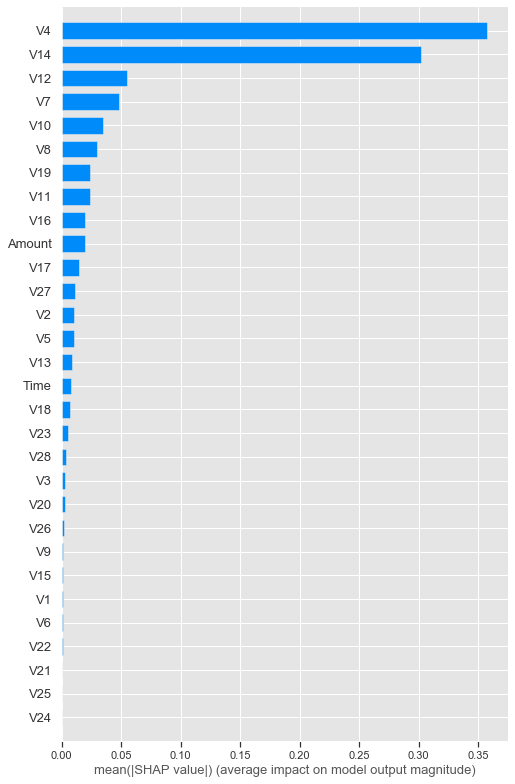

In [52]:
max_display = 30
shap.summary_plot(shap_values, df_Xtest, plot_type="bar",
                  max_display = max_display)

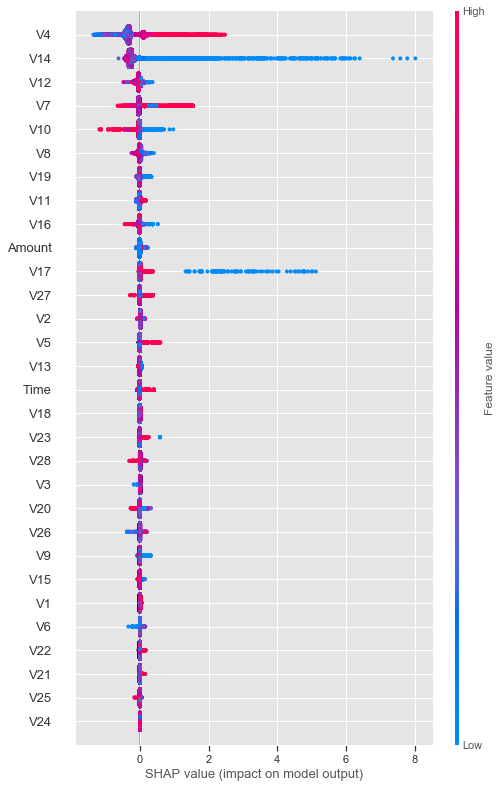

In [53]:
shap.summary_plot(shap_values, df_Xtest, plot_type='dot', max_display = max_display)

In [54]:
# Replicate Shap Importance Chart
import pprint

df_shap = pd.DataFrame(shap_values, columns = df_Xtrain.columns)
df_fimp = df_shap.abs().mean(axis = 0).sort_values(ascending = False)

print(df_fimp.head(max_display))

V4        0.357088
V14       0.301547
V12       0.055153
V7        0.048107
V10       0.034398
V8        0.029588
V19       0.023857
V11       0.023529
V16       0.019581
Amount    0.019335
V17       0.014233
V27       0.011283
V2        0.010559
V5        0.010101
V13       0.008350
Time      0.008105
V18       0.006772
V23       0.004992
V28       0.003993
V3        0.002967
V20       0.002626
V26       0.002074
V9        0.001356
V15       0.001166
V1        0.001035
V6        0.001002
V22       0.000781
V21       0.000379
V25       0.000159
V24       0.000000
dtype: float32


In [55]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

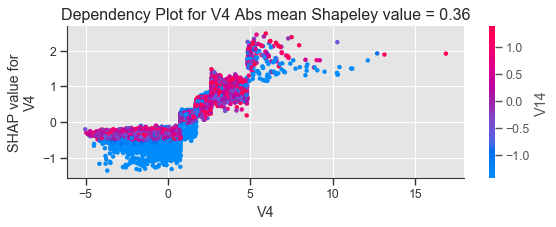

<Figure size 576x576 with 0 Axes>

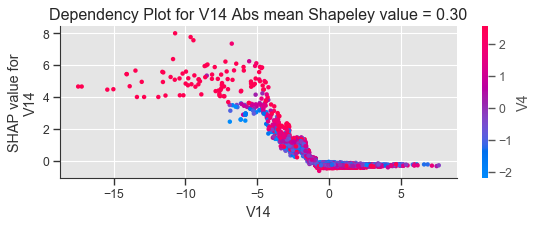

<Figure size 576x576 with 0 Axes>

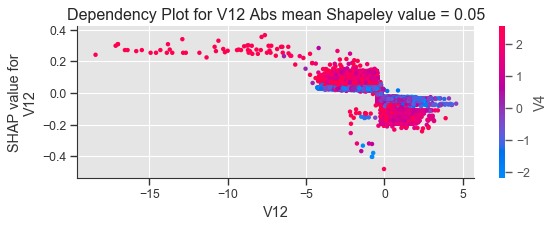

<Figure size 576x576 with 0 Axes>

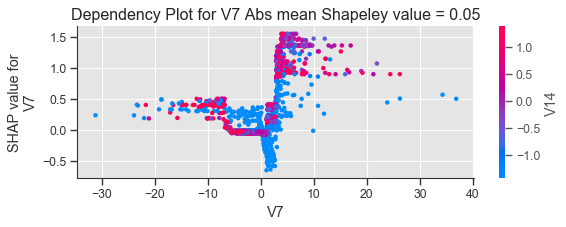

<Figure size 576x576 with 0 Axes>

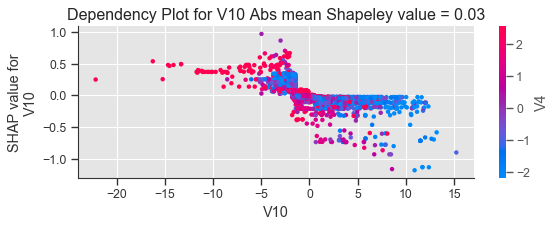

<Figure size 576x576 with 0 Axes>

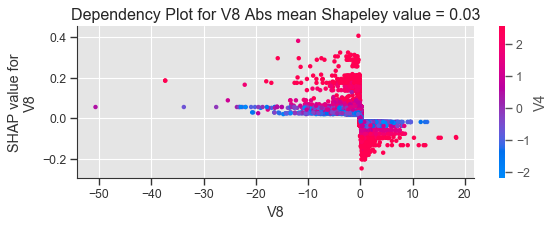

<Figure size 576x576 with 0 Axes>

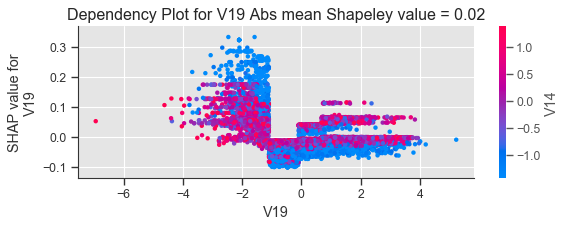

<Figure size 576x576 with 0 Axes>

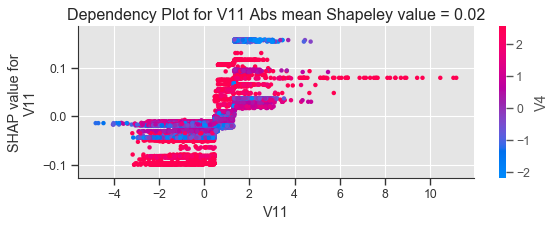

<Figure size 576x576 with 0 Axes>

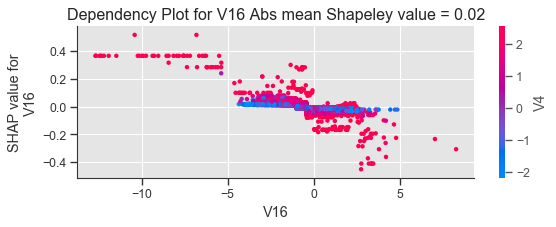

<Figure size 576x576 with 0 Axes>

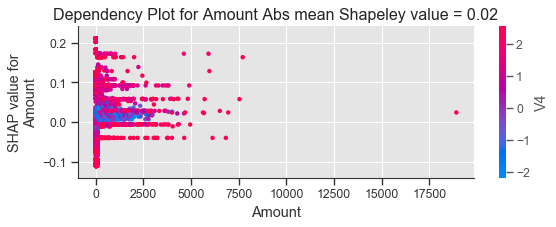

<Figure size 576x576 with 0 Axes>

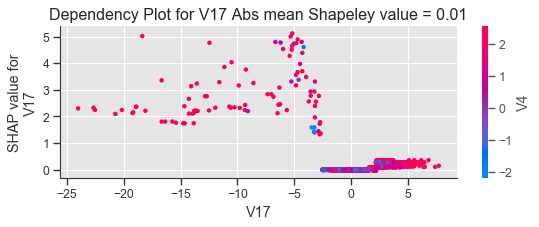

<Figure size 576x576 with 0 Axes>

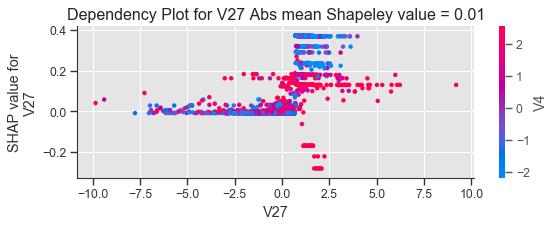

<Figure size 576x576 with 0 Axes>

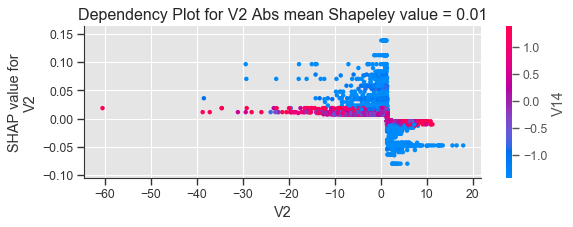

<Figure size 576x576 with 0 Axes>

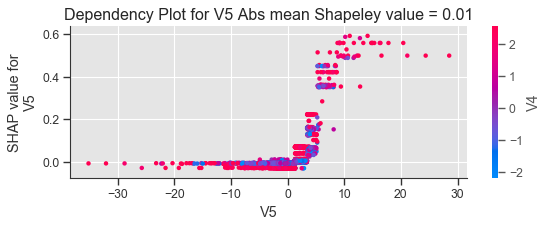

<Figure size 576x576 with 0 Axes>

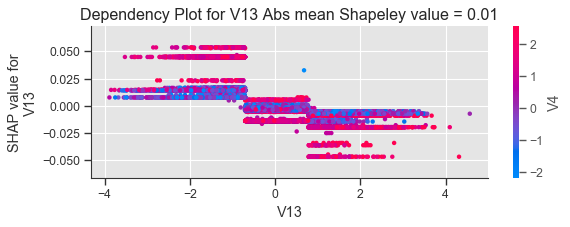

<Figure size 576x576 with 0 Axes>

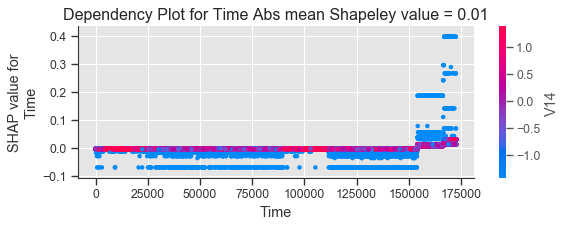

<Figure size 576x576 with 0 Axes>

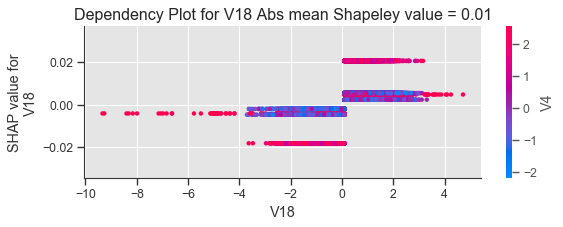

<Figure size 576x576 with 0 Axes>

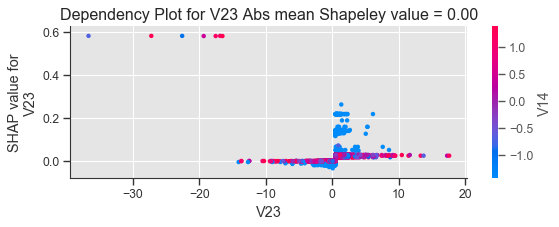

<Figure size 576x576 with 0 Axes>

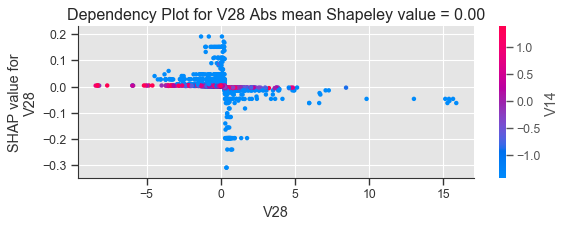

<Figure size 576x576 with 0 Axes>

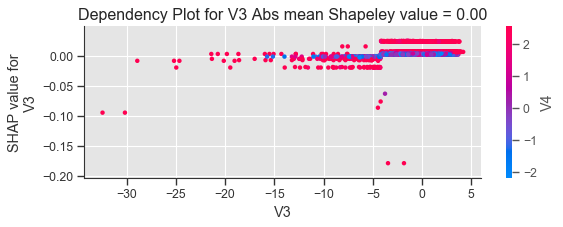

<Figure size 576x576 with 0 Axes>

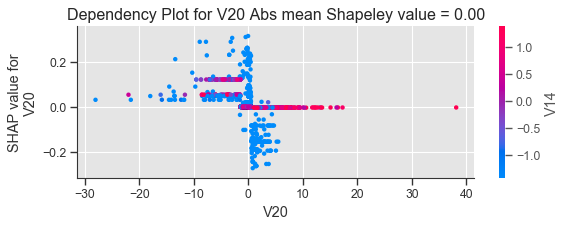

<Figure size 576x576 with 0 Axes>

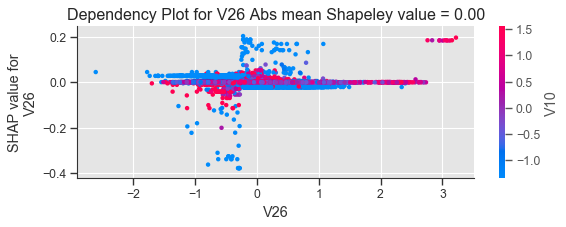

<Figure size 576x576 with 0 Axes>

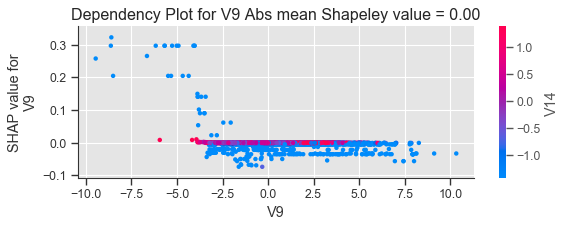

<Figure size 576x576 with 0 Axes>

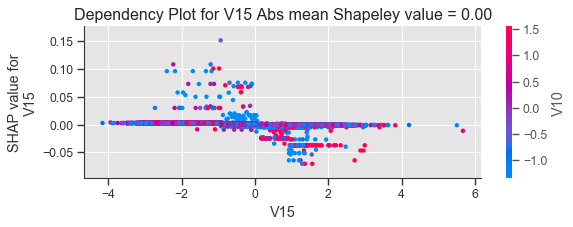

<Figure size 576x576 with 0 Axes>

invalid value encountered in true_divide
invalid value encountered in true_divide


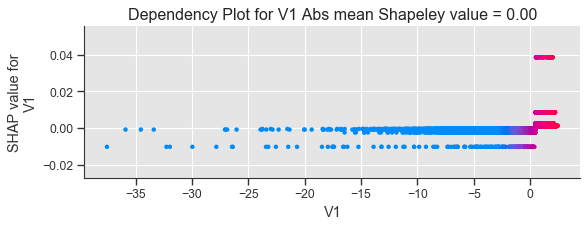

<Figure size 576x576 with 0 Axes>

invalid value encountered in true_divide
invalid value encountered in true_divide


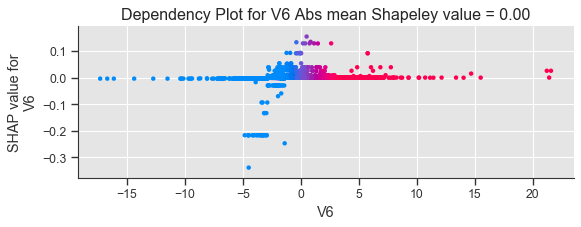

<Figure size 576x576 with 0 Axes>

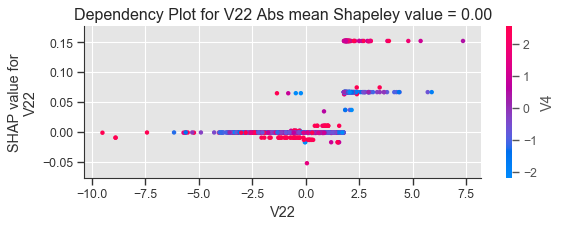

<Figure size 576x576 with 0 Axes>

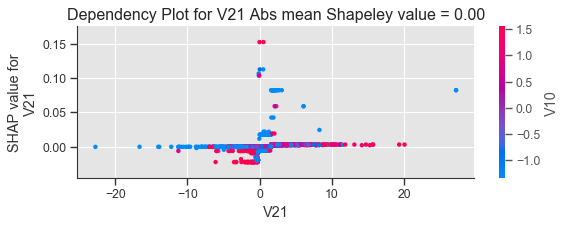

<Figure size 576x576 with 0 Axes>

invalid value encountered in true_divide
invalid value encountered in true_divide


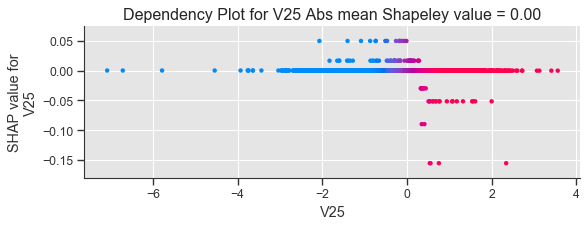

<Figure size 576x576 with 0 Axes>

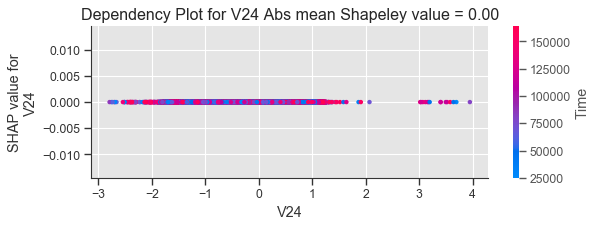

<Figure size 576x576 with 0 Axes>

In [57]:
dict_shap = (df_fimp.round(3).iloc[:max_display].to_dict())

num_subplots = len(dict_shap)
for i,v in enumerate(dict_shap):
    plt.figure(num=None, figsize=(8, 3*num_subplots),
               dpi=80, facecolor='w', edgecolor='k');
    ax1 = plt.subplot(num_subplots,1,i+1);
    
    title = f"Dependency Plot for {v.title()}"
    title += f" Abs mean Shapeley value = {dict_shap[v]:.2f}"
    
    ax1.set_title(title);
    shap.dependence_plot(v, shap_values, df_Xtest, ax = ax1)

    plt.tight_layout()
    plt.show()

In [58]:
N = 10
df_top_ytrain = ser_ytrain.reset_index().sort_values('Class',ascending=False)\
                           .head(N).reset_index(drop=True)
df_top_ytrain

index  Class
0  154694      1
1  261056      1
2  156988      1
3  150684      1
4  252774      1
5  215984      1
6  128479      1
7   69498      1
8   12369      1
9  143188      1

In [59]:
# shap_values[:N]

In [60]:
for i,v in df_top_ytrain.iterrows():
    case, result = v.to_numpy()
    print("CASE {} - Test Fraudulent".format(case))
    
    # plot force plot
    display(shap.force_plot(explainer.expected_value,
                        shap_values[i,:],
                        df_Xtest.iloc[i,:]))

CASE 154694 - Test Fraudulent


CASE 261056 - Test Fraudulent


CASE 156988 - Test Fraudulent


CASE 150684 - Test Fraudulent


CASE 252774 - Test Fraudulent


CASE 215984 - Test Fraudulent


CASE 128479 - Test Fraudulent


CASE 69498 - Test Fraudulent


CASE 12369 - Test Fraudulent


CASE 143188 - Test Fraudulent


In [61]:
notebook_end_time = time.time()
time_taken = time.time() - notebook_start_time
h,m = divmod(time_taken,60*60)
print('Time taken to run whole noteook: {:.0f} hr {:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole noteook: 1 hr 54 min 18 secs
